In [30]:
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd 
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from matplotlib.colors import ListedColormap


In [22]:
data_set = pd.read_csv("datasets/Mall_Customers.csv")


In [23]:
x = data_set.iloc[:,[2,3]].values
y = data_set.iloc[:,4].values


In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.25,random_state = 0)


In [25]:
st_x = StandardScaler()
x_train = st_x.fit_transform(x_train)
x_test = st_x.transform(x_test)

In [26]:
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(x_train,y_train)


SVC(kernel='linear', random_state=0)

In [27]:
y_pred = classifier.predict(x_test)
print(y_pred)

[86 42 42 42 42 42 75 42 14 42 75 86 14 14 14 14 75 42 42 42 42 73 13 73
 42 14 14 42 13 73 13 42 14 42 42 42 42 73 42 42 14 14 14 14 14 73 73 14
 14 75 42 14 75 73 14 42 86 14 75 73 75 14 73]


In [29]:
cm = confusion_matrix(y_test,y_pred)
print(cm)


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


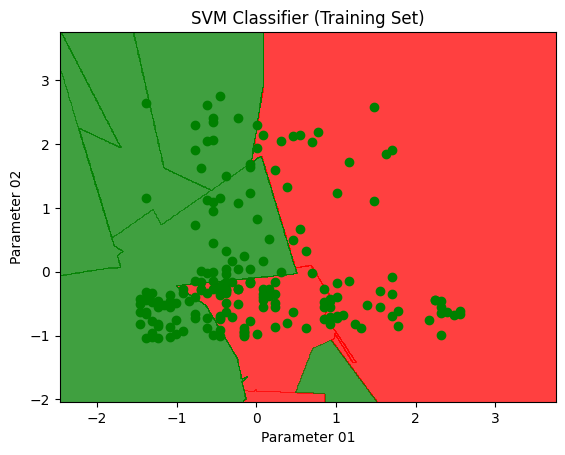

In [37]:
x_set,y_set = x_train,y_train
x1,x2 = nm.meshgrid(nm.arange(start =x_set[:,0].min() - 1 ,stop = x_set[:,1].max() + 1,step = 0.01),
nm.arange(start=x_set[:,1].min() - 1, stop = x_set[:,1].max() + 1,step = 0.01))

mtp.contourf(x1,x2,classifier.predict(nm.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
alpha = 0.75,cmap = ListedColormap(('red','green')))

mtp.xlim(x1.min(),x1.max())
mtp.ylim(x2.min(),x2.max())

for i,j in enumerate(nm.unique(y_set)):
    mtp.scatter(x_set[y_set == j,0],x_set[y_set == j,1], color = ListedColormap(('red','green'))(i),label = j)

mtp.title('SVM Classifier (Training Set)')
mtp.xlabel("Parameter 01")
mtp.ylabel("Parameter 02")

mtp.show()

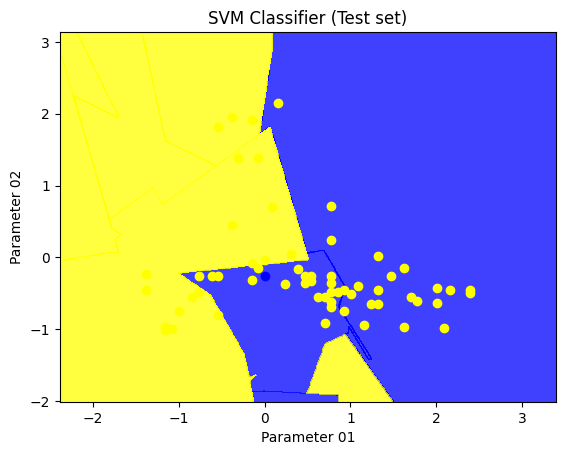

In [40]:
xset,yset = x_test,y_test
x1,x2 = nm.meshgrid(nm.arange(start = xset[:,0].min() - 1,stop = xset[:,0].max() + 1, step = 0.01),
nm.arange(start=xset[:,1].min() - 1,stop = xset[:,1].max() + 1, step = 0.01))
mtp.contourf(x1,x2,classifier.predict(nm.array([x1.ravel(),x2.ravel()]).T).reshape(x1.shape),
alpha = 0.75, cmap = ListedColormap(('blue','yellow')))

mtp.xlim(x1.min(),x1.max())
mtp.ylim(x2.min(),x2.max())
for i,j in enumerate (nm.unique(yset)):
    mtp.scatter(xset[yset == j,0], xset[yset == j,1],
    color = ListedColormap(('blue','yellow'))(i),label = j)

mtp.title("SVM Classifier (Test set)")
mtp.xlabel("Parameter 01")
mtp.ylabel("Parameter 02")
mtp.show()
